 # $$\LARGE\text{Model Project}$$

## The Cournot model of oligopoly

In a Cournot model of oligopoly firms compete in quantity of homogenous products in a market with no collusion. The model describes the rational behaviour of the individual firm in the decision of output given the rivals decision of output. 

This project examines the case with two competing symmetric firms with complete information. Both firms choose output simultaneously. 

### 1. Firms

Firm $i$ choose to produce quantity $q_i$ of a homogeneous product in a market of two firms, with both firms having the same constant marginal cost at $c$. The inverse demand function for firm $i$ is assumed to be $p_i(q_i,q_j)=a-q_i-q_j$, where $c<a$. The profit function becomes

$$\pi_i(q_i,q_j) = p_i(q_i,q_j)q_i-q_i  c$$

The firms' best response functions $(BR_i)$ are calculated by maximizing the profit function. 

$$\underset{q_i}{\textbf{max}} \hspace{0.2cm} \pi_i(qi,qj) $$

This results in 
$$BR_i(q_j) = \frac{a-c-q_j}{2}$$

If the quantity chosen by each firm is to be a Nash equilibrium it must satisfy the bestresponse functions. Given symmetry the Nash equilibrium output is
$$q_i^* = \frac{a-c}{3}$$

Each firms best response is optimal given the best response chosen by the rival - with no incentive to deviate. 

In [2]:
#1.a import modules
import numpy as np
import sympy as sm
from numpy import array
from scipy import linalg
from scipy import optimize
import matplotlib.pyplot as plt

### 2. Define model

In [3]:
#2.a Define symbols
a = sm.symbols('a')
c = sm.symbols('c')
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
pi_1 = sm.symbols('\pi_1')
pi_2 = sm.symbols('\pi_2')

# 2.b Inverse demand function
def inverse_demand(q1,q2,a):
    inverse = a - q1 - q2
    return inverse

# 2.c cost functions
def cost(q,c):
    cost_1 = q * c
    return cost_1

# 2.d Profit functions
def profit_firm1(q1,q2,a,c):
    pi_1 = (inverse_demand(q1,q2,a)) * q1 - cost(q1,c)
    return pi_1
def profit_firm2(q1,q2,a,c):
    pi_2 = inverse_demand(q1,q2,a) * q2 - cost(q2,c)
    return pi_2

### 3. Step-by-step solution of maximization problem

Solve in three steps:

1. **maximize** profit function wrt. $q_i$ (find FOCs) and set to zero
2. **isolate** $q_i$ from the first order conditions (find BR functions)
3. **substitute** $q_j$ into $q_i$ (find Nash equilibrium)

#### 3.1 First order conditions
The first order conditions is listed below, where FOC1 denotes the solution for firm 1, and FOC2 for firm 2. 

In [4]:
FOC_1 = sm.diff(profit_firm1(q1,q2,a,c),q1) #derivative wrt. q1 
FOC_2 = sm.diff(profit_firm2(q1,q2,a,c),q2)
print(f'FOC1: {FOC_1} = 0 \nFOC2: {FOC_2} = 0\n')

FOC1: a - c - 2*q_1 - q_2 = 0 
FOC2: a - c - q_1 - 2*q_2 = 0



#### 3.2 Best response functions

The best response function for firm 1 is derived by isolating $q_1$ in FOC1 and
same for firm 2 in FOC2. 

In [5]:
BR_1_sympy = sm.solve(FOC_1,q1) #solve for q1
BR_2_sympy = sm.solve(FOC_2,q2)
print(f'BR_1(q2) = q1 = {BR_1_sympy} \nBR_2(q1) = q2 = {BR_2_sympy}\n')

BR_1(q2) = q1 = [a/2 - c/2 - q_2/2] 
BR_2(q1) = q2 = [a/2 - c/2 - q_1/2]



#### 3.3 Nash Equilibrium

The Nash Equilibrium can be solved for by substituting $q_1$ into $q_2$ which yields

In [6]:
BR1_sympy = a/2-c/2-q2/2
BR2_sympy = a/2-c/2-q1/2 - q2
SUB = BR2_sympy.subs(q1,BR1_sympy)
NE_q = sm.solve(SUB,q2)
quan = (a-c)/3
SUB2 = inverse_demand(q1,q2,a).subs(q1,quan)
NE_p = SUB2.subs(q2,quan)
print(f'q^*_i = {NE_q}')
print(f'p^*  = {NE_p}')

q^*_i = [a/3 - c/3]
p^*  = a/3 + 2*c/3


Which shows the Nash Equilibrium quantity, $q_i^*$, and the equilibrium price $p^*$, where $c1=c2$.

### 4. Solution of the model with two symmetric firms

In this section I derive the best response function for each firm by maximizing their respective profit function. The best response functions are then used to find the Nash Equilibrium, i.e. the optimal choice of quantity given the other firms' choice of quantity. This procedure is described in section 3. 

#### 4.1 Model analysis

In [9]:
#4.a the optimization setup does not always work without running the code below.
#del a, c1, c2, q1, q2, pi_1, pi_2

#4.b Define best response functions
q0=0
def BR_1_analysis(q2,a,c):
    opt_q1 = optimize.minimize(lambda q0: -profit_firm1(q0,q2,a,c), q0).x[0]
    return opt_q1

def BR_2_analysis(q1,a,c):
    opt_q2 = optimize.minimize(lambda q0: -profit_firm2(q1,q0,a,c), q0).x[0]
    return opt_q2

def conditions_analysis(q,param):
    u = q[0] - BR_1_analysis(q[1],param[0],param[1])
    y = q[1] - BR_2_analysis(q[0],param[0],param[1])
    return [u,y]

#4.c Define parametervalues [a,c]
param = [11,2] 

#4.d Solve optimization problem
initial_values = [1,1] 
opt_q_i = optimize.fsolve(conditions_analysis,initial_values, args = (param))
opt_p = param[0]/3 + 2*param[1]/3
profit_i = opt_p * opt_q_i - param[1] * opt_q_i

print(f'With parameter values of [a,c] = {param}, the Nash equilibrium quantities is (q1,q2) = {opt_q_i}.\nThis gives an equilibrium price of p = {opt_p}.')
print(f'Both companies achieve same profit of (pi_1, pi_2) = {profit_i}.\n')

With parameter values of [a,c] = [11, 2], the Nash equilibrium quantities is (q1,q2) = [3. 3.].
This gives an equilibrium price of p = 5.0.
Both companies achieve same profit of (pi_1, pi_2) = [9. 9.].



#### 4.2 Graphical analysis of best response functions

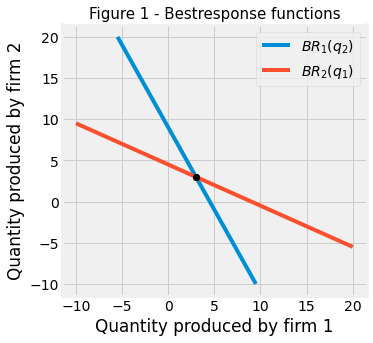

In [10]:
#4.e Define reactions functions
def q1_graphic(q2,param): #parameters can be changed in section 4, code 4.c
    return (param[0]-param[1]-q2)/2

def q2_graphic(q1,param):
    return (param[0]-param[1]-q1)/2

#4.f Create best response to multiple q values
range_q1 = np.linspace(-10,20,100)
range_q2 = np.linspace(-10,20,100)
q1_plot = q1_graphic(range_q2,param)
q2_plot = q2_graphic(range_q1,param)

#4.g Plot best response functions
fig = plt.figure(figsize=(12,5)) 
plt.style.use('fivethirtyeight')
ax_fig1 = fig.add_subplot(1,2,1)
plt.plot(q1_plot,range_q2, label = '$BR_1(q_2)$')
plt.plot(range_q1,q2_plot, label = '$BR_2(q_1)$')
plt.title('Figure 1 - Bestresponse functions', fontsize=15)
plt.plot(opt_q_i,opt_q_i,'ko')
plt.xlabel('Quantity produced by firm 1')
plt.ylabel('Quantity produced by firm 2')
ax_fig1.grid(True)
plt.legend(loc="best")

In [50]:
print("Note: the Figure is misleading with the negative quantities on the axis'; negative quantities are not feasible.\nI have not find a way to solve this problem yet.")

Note: the Figure is misleading with the negative quantities on the axis'; negative quantities are not feasible.
I have not find a way to solve this problem yet.


The two best response functions in Figure 1 intersect at the black dot and represents the Nash Equilibrium quantities found in section 4.1. Both functions decreases in the rival firm's quantity; the intuition is that whenever one firm increase output it is optimal for the rival to decrease quantity. 

#### 4.3 How does increasing marginal cost affect the equilibrium?

In [13]:
#4.h Calculate equilibrium at different costs
c_vec = np.linspace(1,10,10)
for c in c_vec:
    q = (param[0]-c)/3
    pi = (param[0]-q-q-c)*q
    p = param[0]/3 + 2*c/3
    print(f'a = {param[0]}, c = {c} --> q = {q:.2f}, p = {p:.2f} --> Profit = {pi:.2f}')

#4.i Code does not work (want to plot marginal cost against equilibrium quantity)
#plt.plot(c_vec,q)
#plt.title('Figure 2 - Equilibrium quantity given c', fontsize=15)
#plt.xlabel('Marginal cost')
#plt.ylabel('Equilibrium quantity')
#ax_fig1.grid(True)

a = 11, c = 1.0 --> q = 3.33, p = 4.33 --> Profit = 11.11
a = 11, c = 2.0 --> q = 3.00, p = 5.00 --> Profit = 9.00
a = 11, c = 3.0 --> q = 2.67, p = 5.67 --> Profit = 7.11
a = 11, c = 4.0 --> q = 2.33, p = 6.33 --> Profit = 5.44
a = 11, c = 5.0 --> q = 2.00, p = 7.00 --> Profit = 4.00
a = 11, c = 6.0 --> q = 1.67, p = 7.67 --> Profit = 2.78
a = 11, c = 7.0 --> q = 1.33, p = 8.33 --> Profit = 1.78
a = 11, c = 8.0 --> q = 1.00, p = 9.00 --> Profit = 1.00
a = 11, c = 9.0 --> q = 0.67, p = 9.67 --> Profit = 0.44
a = 11, c = 10.0 --> q = 0.33, p = 10.33 --> Profit = 0.11


This output shows that increasing marginal costs decreases amount of quantity produced in equilibrium per firm. The intuition is that increasing marginal costs makes it more expensive for the firms to produce goods, which leads them to increase prices by lowering amount of goods produced. 



### 5. What happens if more firms enters the market?

I will now introduce a third firm. Each firms profit is now 
$$\pi_i(q_i,q_j,q_k) = p_i(q_i,q_j,q_k)q_i-q_i  c, \hspace{0.2cm}\\ p_i=a-q_1-q_2-q_3$$

The firms' best response functions $(BR_i)$ are calculated by maximizing the profit function. 

$$\underset{q_i}{\textbf{max}} \hspace{0.2cm} \pi_i(qi,qj,q_k) $$

This results in 
$$BR_i(q_j,q_k) = \frac{a-c-q_j-q_k}{2}$$

The Nash equilibrium quantity becomes
$$q_i^* = \frac{a-c}{4}$$

The parametervalues for $a$ and $c$ are defined in codeline 4.c. Results will be compared with results from sections 4.1 in order to conclude what affect a third firm has on the market.

$\underline{\text{Solve in three steps:}}$
1. **maximize** profit function wrt. $q_i$ (find FOCs)
2. **isolate** $q_i$ from the first order conditions (find BR functions)
3. **substitute** $q_j$ and $q_k$ into $q_i$ (find Nash equilibrium)

In [12]:
#5.a define inverse demand function
def inverse_morefirms(q1,q2,q3,a):
    demand = a - q1 - q2 - q3
    return demand

#5.b define profit functions
def profit_firm1_morefirms(q1,q2,q3,a,c):
    return inverse_morefirms(q1,q2,q3,a) * q1 - cost(q1,c)
def profit_firm2_morefirms(q1,q2,q3,a,c):
    return inverse_morefirms(q1,q2,q3,a) * q2 - cost(q2,c)
def profit_firm3_morefirms(q1,q2,q3,a,c):
    return inverse_morefirms(q1,q2,q3,a) * q3 - cost(q3,c)

#5.c define bestresponse functions by maximizing profits
def BR1_morefirms(q2,q3,a,c):
    optimal_q1 = optimize.minimize(lambda q0: -profit_firm1_morefirms(q0,q2,q3,a,c), q0).x[0]
    return optimal_q1
def BR2_morefirms(q1,q3,a,c):
    optimal_q2 = optimize.minimize(lambda q0: -profit_firm2_morefirms(q1,q0,q3,a,c), q0).x[0]
    return optimal_q2
def BR3_morefirms(q1,q2,a,c):
    optimal_q3 = optimize.minimize(lambda q0: -profit_firm3_morefirms(q1,q2,q0,a,c), q0).x[0]
    return optimal_q3

#5.d conditions
def conditions_morefirms(q,param):
    u = q[0] - BR1_morefirms(q[1],q[2],param[0],param[1])
    y = q[1] - BR2_morefirms(q[0],q[2],param[0],param[1])
    z = q[2] - BR3_morefirms(q[0],q[1],param[0],param[1])
    return [u,y,z]

#5.e solution and print
inital_values = [1,1,1]
opt_qi_morefirms = optimize.fsolve(conditions_morefirms,inital_values, args = (param))
opt_p_morefirms = param[0] - 3/4 * (param[0]-param[1])
profit_i_morefirms = opt_p_morefirms * opt_qi_morefirms - param[1] * opt_qi_morefirms

print(f'With parameter values of [a,c] = {param}, the Nash equilibrium quantities is (q1,q2,q3) = {opt_qi_morefirms}.\nThis gives an equilibrium price of p = {opt_p_morefirms}.')
print(f'Both companies achieve same profit of (pi_1, pi_2) = {profit_i_morefirms}.\n')

With parameter values of [a,c] = [11, 2], the Nash equilibrium quantities is (q1,q2,q3) = [2.24999997 2.25000001 2.25000001].
This gives an equilibrium price of p = 4.25.
Both companies achieve same profit of (pi_1, pi_2) = [5.06249992 5.06250003 5.06250003].



These results indicates a decreasing price and quantity produced by each firm, when a third firm enter the market. The intuition is that as firms increase in the market, power of each firm becomes smaller and values come closer to the perfect competition outcome; market price equals marginal cost of production and zero profits.

### 6. Conslusion

In a Cournot model of duopoly firms choice of production depends on the rivals production as illustrated in Figure 1. I found that the equilibrium market price is higher than the marginal cost of production, which means that firms do not price and produce as in perfect competition situation. In section 4.3 I found that increasing marginal cost of production leads the market into af perfect competition situation since profit converges towards zero as the marginal cost increases. 
Adding a third firm to the market resulted in decreasing price and quantity, i.e. the existing firms were worse off. 